In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("classification_first")\
        .getOrCreate()
spark
    

In [95]:
from pyspark.ml.classification import RandomForestClassifier
from preprocssing import preprocess_csv
from training import trainig_inference
                            

printing dataframe
 =====
   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   

  Class/ASD Traits   
0                No  
1               Yes  
number of rows 1054
removing nan from columns
number of rows 1054
 printing dataframe schema 

root
 |-- Case_No: integer (nullable = true)
 |-- A1: integer (nullable = true)
 |-- A2: integer (nullable = true)
 |-- A3: integer (nullable = true)
 |-- A4: integer (nullable = true)
 |-- A5: integer (nullable = true)
 |-- A6: integer (nullable = true)
 |-- A7: integer (nullable = true)
 |-- A8: integer (nullable = true)
 |-- A9: int

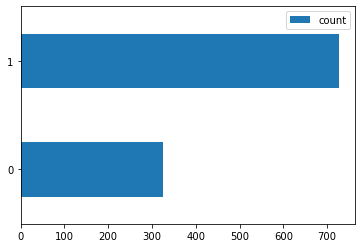

In [96]:
df_train, df_test, features_list = preprocess_csv(
    csv_file_name='Toddler Autism dataset July 2018.csv',
    dependent_var='Class/ASD Traits ',
    treat_outlier=True,
    train_split=0.7,
    test_split=0.3
)


In [97]:
model_, fi, pred = trainig_inference(
    classifier_name=RandomForestClassifier(),
    df_train=df_train,
    df_test=df_test,
    features_list=features_list
)

accuracy of the model on test data is 1.0



In [98]:
fi.show()

+--------------------+-------------------+
|            features|feature_importances|
+--------------------+-------------------+
|      Qchat-10-Score| 0.5261002376034309|
|                  A6|0.13308836257838527|
|                  A1|0.12348050828935966|
|                  A4|0.07651949171064036|
|                  A7|0.07389976239656913|
|                  A2|0.06691163742161475|
|            Jaundice|                0.0|
|            Age_Mons|                0.0|
|                  A3|                0.0|
|                  A8|                0.0|
|Who completed the...|                0.0|
|             Case_No|                0.0|
|                  A9|                0.0|
|                 A10|                0.0|
|           Ethnicity|                0.0|
|                 Sex|                0.0|
| Family_mem_with_ASD|                0.0|
|                  A5|                0.0|
+--------------------+-------------------+



In [99]:
pred.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(18,[0,1,2,3,4,7,...|[4.73360107095046...|[0.94672021419009...|       0.0|
|  0.0|(18,[0,1,2,3,5,6,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,2,3,6,7,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,2,4,5,6,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,2,4,5,6,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,2,4,6,7,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,2,4,6,7,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,2,4,6,7,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,2,4,6,7,...|[4.81184989333894...|[0.96236997866778...|       0.0|
|  0.0|(18,[0,1,

In [100]:
df_train.count(), df_test.count()
df_train.show(5, False)

+-----+---------------------------------------------------------------------------------------------------------------------------+
|label|features                                                                                                                   |
+-----+---------------------------------------------------------------------------------------------------------------------------+
|0.0  |(18,[0,1,2,3,4,8,11,12,13,14],[907.8822412155745,1000.0,1000.0,1000.0,1000.0,1000.0,416.66666666666663,500.0,1000.0,500.0])|
|0.0  |(18,[0,1,2,3,5,6,9,10,11,12],[935.4226020892687,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,458.3333333333333,700.0]) |
|0.0  |(18,[0,1,2,3,5,7,8,10,12,14],[14.245014245014245,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,700.0,400.0])            |
|0.0  |(18,[0,1,2,3,5,7,11,12,14],[748.338081671415,1000.0,1000.0,1000.0,1000.0,1000.0,958.3333333333333,500.0,600.0])            |
|0.0  |(18,[0,1,2,3,7,8,11,12,14,17],[925.9259259259259,1000.0,1000.0,1000.0